## Multivariate Distributions

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
tfd = tfp.distributions

In [3]:
mv_normal = tfd.MultivariateNormalDiag(loc = [-1, 0.5], scale_diag = [1., 1.5])

print(mv_normal)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)


In [4]:
mv_normal.event_shape

TensorShape([2])

Sampling

In [5]:
mv_normal.sample(3)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.8327935 ,  1.9683203 ],
       [ 0.7831279 , -0.625597  ],
       [-2.979981  ,  0.45271784]], dtype=float32)>

In [6]:
batched_normal = tfd.Normal(loc = [-1, 0.5], scale = [1., 1.5])
print(batched_normal)

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)


In [7]:
batched_normal.sample(3)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.2811091 ,  0.43381077],
       [-0.89696217,  0.8750274 ],
       [-0.41626608,  1.751637  ]], dtype=float32)>

Batch_shape is different from event_shape:

In [8]:
mv_normal.log_prob([-0.2, 1.8])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.9388978>

In [9]:
batched_normal.log_prob([-0.2, 1.8])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.2389386, -1.699959 ], dtype=float32)>

Batched multivariate distribution

In [11]:
batched_mv_normal = tfd.MultivariateNormalDiag(
    loc = [[-1, 0.5], [2., 0.], [-0.5, 1.5]],
    scale_diag = [[1., 1.5], [2., 0.5], [1., 1.]])

batched_mv_normal  # batch = 3 --> 3 distributions    event = 2 --> Two-dimensional random variable

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [13]:
batched_mv_normal.sample(2)    # (2 sample, 3 batch_size, 2 event_size)

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[-1.4606912 ,  0.9474258 ],
        [-0.61074996, -0.22227909],
        [ 0.48927408,  2.3344924 ]],

       [[-1.2400165 , -1.3873723 ],
        [ 1.3516192 ,  0.20085458],
        [ 0.48032063,  2.7704496 ]]], dtype=float32)>

## Coding session

### Basic multivariate distributions

In [15]:
# Define 2D multivariate Gaussian with diagonal covariance matrix

normal_diag = tfd.MultivariateNormalDiag(loc = [0, 1], scale_diag = [1,2])
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [16]:
# Sample from it
normal_diag.sample(10)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1.3062586 ,  3.2496915 ],
       [-2.5045485 ,  2.3949807 ],
       [ 3.2347667 , -2.4585545 ],
       [ 0.72856104, -0.32016528],
       [ 1.9036446 ,  3.7569973 ],
       [ 1.5111303 ,  2.4688911 ],
       [-0.12147224,  0.59797835],
       [ 1.7658144 , -0.503742  ],
       [ 0.7126586 ,  1.3754282 ],
       [ 0.20624954,  0.6085667 ]], dtype=float32)>

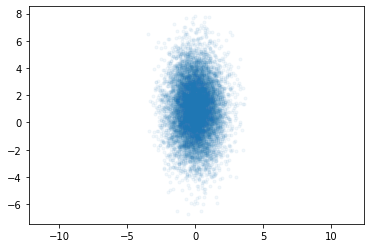

In [17]:
# Make a plot

plt_sample = normal_diag.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker = '.', alpha = 0.05)
plt.axis('equal')
plt.show()

### Batches of multivariate distributions

In [18]:
# Create three "batches" of multivariate normals

normal_diag_batch = tfd.MultivariateNormalDiag(loc = [[0, 0], [0,0], [0,0]], scale_diag = [[1,2],[2,1],[2,2]])

normal_diag_batch

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [19]:
# Sample from it
samples = normal_diag_batch.sample(5)
samples

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[ 2.6812108 ,  1.8594066 ],
        [-1.1962218 , -0.42201495],
        [-0.48786888,  1.2403944 ]],

       [[ 0.5197988 , -3.5582078 ],
        [-0.521346  ,  0.5000226 ],
        [ 1.223559  , -0.08173308]],

       [[ 1.6155356 ,  2.1331384 ],
        [-4.3776174 ,  0.5475175 ],
        [-0.3616539 , -0.88556385]],

       [[ 1.0964862 ,  0.36878383],
        [-4.5660334 ,  0.02980305],
        [-0.38421258,  4.4412923 ]],

       [[ 0.3965163 ,  0.7735952 ],
        [-0.57003355, -0.87532896],
        [ 1.7486202 , -0.8411752 ]]], dtype=float32)>

In [22]:
# Comput log probs
normal_diag_batch.log_prob(samples)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-6.5576434, -2.7989407, -3.4462457],
       [-4.248725 , -2.6900108, -3.4121437],
       [-4.4047866, -5.0763535, -3.3385487],
       [-3.1491654, -5.137551 , -5.708258 ],
       [-2.684443 , -2.954742 , -3.6948276]], dtype=float32)>

In [23]:
# Create a sample for a plot -- notice the shape

plt_sample_batch = normal_diag_batch.sample(10000)
plt_sample_batch.shape

TensorShape([10000, 3, 2])

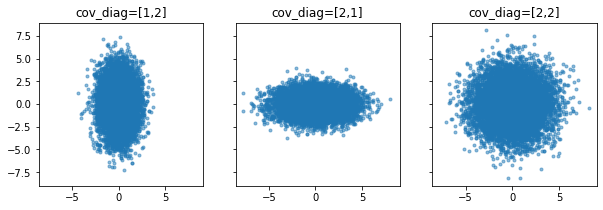

In [26]:
# Plot samples from the batched multivariate Gaussian

fig, axs = plt.subplots(1,3,sharex = True, sharey=True, figsize=(10,3))
titles = ['cov_diag=[1,2]', 'cov_diag=[2,1]', 'cov_diag=[2,2]']

for i, (ax,title) in enumerate(zip(axs,titles)):
    samples = plt_sample_batch[:, i, :]  # take the ith batch [samples x event_shape]
    ax.scatter(samples[:, 0], samples[:,1], marker = '.', alpha = 0.5)
    ax.set_title(title)

plt.show()